#Calculate the properties of [N II] lines from CDF archive

In [2]:
%matplotlib inline

In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import pprint as pp
CDF_dir = '/Users/yaolun/data/CDF_archive/'

In [2]:
filename = '/Users/yaolun/Copy/proposal/line_fitting/CDF_archive_lines.txt'
# Read in all line fitting results
data = ascii.read(filename)

In [3]:
# read line fitting setting log
log = ascii.read(CDF_dir+'full_source_list.txt')

In [4]:
# mask out the non-valid lines and get strong lines only
fitting = data[(data['Validity'] != 0) & (data['SNR'] > 10) & (data['Str(W/cm2/as2)'] >= 0)]
# reject objects without full fitting steps
fitting = fitting[(fitting['Object'] != 'HD50138') & (fitting['Object'] != 'RYLup')]
nii_205 = fitting[fitting['Line'] == 'NII_205']
nii_122 = fitting[fitting['Line'] == 'NII_122']

In [8]:
print nii_122
print nii_122['SNR']

 Object    Line   LabWL(um)   ObsWL(um)  ... Pixel_No.  Blend   Validity
-------- ------- ----------- ----------- ... --------- -------- --------
V1515Cyg NII_122 121.9000015 121.9139082 ...         2        x        1
V1515Cyg NII_122 121.9000015 121.9205533 ...         8        x        1
V1515Cyg NII_122 121.9000015 121.9045272 ...        13 Red/Blue        1
V1515Cyg NII_122 121.9000015 121.9082862 ...        18 Red/Blue        1
V1515Cyg NII_122 121.9000015 121.9093594 ...        19        x        1
V1515Cyg NII_122 121.9000015 121.9084734 ...        24 Red/Blue        1
V1515Cyg NII_122 121.9000015 121.9154057 ...        25 Red/Blue        1
V1515Cyg NII_122 121.9000015 121.9045502 ...         c Red/Blue        1
    SNR    
-----------
10.27682425
12.06956774
 11.2016076
10.18398394
10.44949806
10.02342162
11.35113749
11.19748731


In [5]:
print np.mean(nii_122['ObsWL(um)']), np.mean(nii_205['ObsWL(um)'])
print np.std(nii_122['ObsWL(um)']), np.std(nii_205['ObsWL(um)'])
print np.sum(nii_122['Sig_Cen(um)']**2)**0.5, np.sum(nii_205['Sig_Cen(um)']**2)**0.5
pp.pprint(set(nii_122['Object']))
pp.pprint(set(nii_205['Object']))
print len(nii_122['Sig_Cen(um)']), len(nii_205['Sig_Cen(um)'])

121.91063295 205.177444049
0.00184557156306 0.00278093894961
0.00542656695957 0.00736492074694
set(['V1515Cyg'])
set(['FUOri', 'HH46', 'V1057Cyg', 'V1331Cyg', 'V1515Cyg'])
8 113


##Plot the spectral lines

###[N II] 122 um

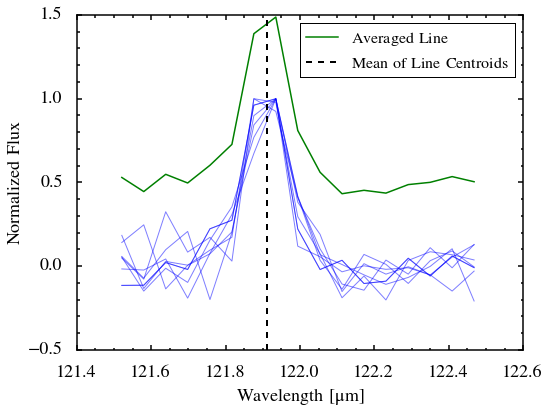

In [92]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for i in range(0, len(nii_122['Line'])):
    if nii_122['Pixel_No.'][i] == 'c':
        wl_dum, flux_dum = np.genfromtxt(CDF_dir+nii_122['Object'][i]+'/pacs/advanced_products/'+nii_122['Object'][i]+\
                        '_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_flat_spectrum.txt', skip_header=1).T
        # normalize flux
        flux_dum = flux_dum[(wl_dum > 121.5) & (wl_dum < 122.5)]; flux_dum = flux_dum/max(flux_dum)
        wl_dum = wl_dum[(wl_dum > 121.5) & (wl_dum < 122.5)]
        ax.plot(wl_dum, flux_dum, '-', color='b', alpha=0.5)
    
    else:
        wl_dum, flux_dum = np.genfromtxt(CDF_dir+nii_122['Object'][i]+'/pacs/advanced_products/cube/'+nii_122['Object'][i]+\
                        '_pacs_pixel'+nii_122['Pixel_No.'][i]+'_os8_sf7_flat_spectrum.txt', skip_header=1).T
        # normalize flux
        flux_dum = flux_dum[(wl_dum > 121.5) & (wl_dum < 122.5)]; flux_dum = flux_dum/max(flux_dum)
        wl_dum = wl_dum[(wl_dum > 121.5) & (wl_dum < 122.5)]
        ax.plot(wl_dum, flux_dum, '-', color='b', alpha=0.5)
    
    if i == 0:
        avg_flux = flux_dum
        avg_wl   = wl_dum
    else:
        avg_flux = avg_flux + flux_dum

avg, = ax.plot(avg_wl, avg_flux/len(nii_122['Line'])+0.5, '-', color='g', linewidth=1.5)
mean = ax.axvline( x=np.mean(nii_122['ObsWL(um)']), linestyle='--', color='k', linewidth=2)
ax.legend([avg, mean], [r'$\rm{Averaged\,Line}$', r'$\rm{Mean\,of\,Line\,Centroids}$'], numpoints=1, loc='best',fontsize=16)

ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Normalized\,Flux}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/test/NII_122_CDF.pdf', format='pdf', dpi=300, bbox_inches='tight')

##[N II] 205 um

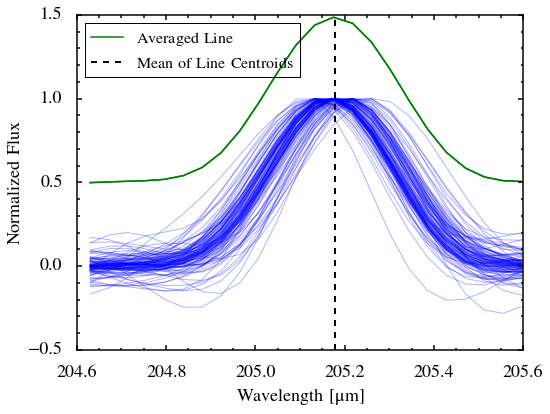

In [91]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for i in range(0, len(nii_205['Line'])):
    if nii_205['Pixel_No.'][i] == 'c':
        wl_dum, flux_dum = np.genfromtxt(CDF_dir+nii_205['Object'][i]+'/spire/advanced_products/'+nii_205['Object'][i]+\
                        '_spire_corrected_flat_spectrum.txt', skip_header=1).T
        # normalize flux
        flux_dum = flux_dum[(wl_dum > 204.6) & (wl_dum < 205.6)]; flux_dum = flux_dum/max(flux_dum)
        wl_dum = wl_dum[(wl_dum > 204.6) & (wl_dum < 205.6)]
        ax.plot(wl_dum, flux_dum, '-', color='b', alpha=0.3)
    
    else:
        wl_dum, flux_dum = np.genfromtxt(CDF_dir+nii_205['Object'][i]+'/spire/advanced_products/cube/'+nii_205['Object'][i]+\
                        '_'+nii_205['Pixel_No.'][i]+'_flat_spectrum.txt', skip_header=1).T
        # normalize flux
        flux_dum = flux_dum[(wl_dum > 204.6) & (wl_dum < 205.6)]; flux_dum = flux_dum/max(flux_dum)
        wl_dum = wl_dum[(wl_dum > 204.6) & (wl_dum < 205.6)]
        ax.plot(wl_dum, flux_dum, '-', color='b', alpha=0.3)
    
    if i == 0:
        avg_flux = flux_dum
        avg_wl   = wl_dum
    else:
        avg_flux = avg_flux + flux_dum
ax.plot(avg_wl, avg_flux/len(nii_205['Line'])+0.5, '-', color='g', linewidth=1.5)

avg, = ax.plot(avg_wl, avg_flux/len(nii_205['Line'])+0.5, '-', color='g', linewidth=1.5)
mean = ax.axvline( x=np.mean(nii_205['ObsWL(um)']), linestyle='--', color='k', linewidth=2)
ax.legend([avg, mean], [r'$\rm{Averaged\,Line}$', r'$\rm{Mean\,of\,Line\,Centroids}$'], numpoints=1, loc='best',fontsize=16)


ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Normalized\,Flux}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/test/NII_205_CDF.pdf', format='pdf', dpi=300, bbox_inches='tight')